<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/sales-and-customer-insight/sales_and_customer_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle
import plotly.express as px
import geopandas as gpd

In [2]:
sales=pd.read_csv('sales_and_customer_insights.csv')

In [3]:
sales.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [4]:
sales.shape

(10000, 15)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [6]:
sales.isna().sum()

,0
Customer_ID,0
Product_ID,0
Transaction_ID,0
Purchase_Frequency,0
Average_Order_Value,0
Most_Frequent_Category,0
Time_Between_Purchases,0
Region,0
Churn_Probability,0
Lifetime_Value,0


In [7]:
sales['Peak_Sales_Date']=pd.to_datetime(sales['Peak_Sales_Date'])
sales['year']=sales['Peak_Sales_Date'].dt.year
sales['month']=sales['Peak_Sales_Date'].dt.month
sales['day']=sales['Peak_Sales_Date'].dt.day
sales['Launch_Date']=pd.to_datetime(sales['Launch_Date'])

,Most_Frequent_Category,count
0,Electronics,2567
1,Clothing,2510
2,Home,2476
3,Sports,2447


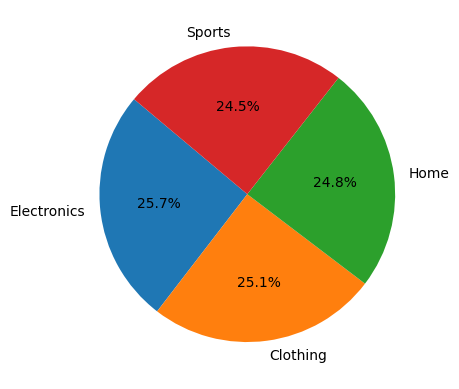

In [8]:
categories=sales['Most_Frequent_Category'].value_counts().reset_index()
plt.pie(categories['count'],labels=categories['Most_Frequent_Category'],autopct='%1.1f%%',startangle=140)
categories

In [9]:
region=sales['Region'].value_counts().reset_index()
region

,Region,count
0,Europe,2547
1,South America,2527
2,Asia,2472
3,North America,2454


In [10]:
season=sales['Season'].value_counts().reset_index()
season


,Season,count
0,Winter,2534
1,Summer,2521
2,Fall,2502
3,Spring,2443


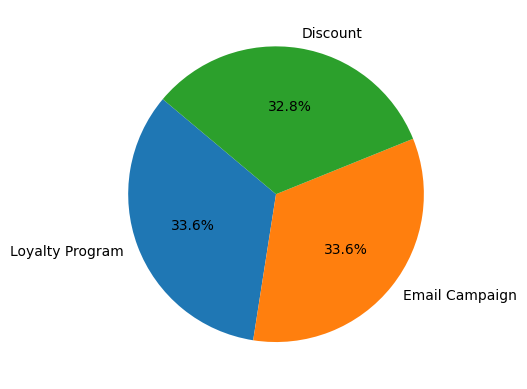

In [11]:
strategy=sales['Retention_Strategy'].value_counts().reset_index()
strategy
plt.pie(strategy['count'],labels=strategy['Retention_Strategy'],autopct='%1.1f%%',startangle=140)
plt.show()

In [12]:
sales['year'].unique()

array([2023], dtype=int32)

In [13]:
sales['Preferred_Purchase_Times'].value_counts().reset_index()

,Preferred_Purchase_Times,count
0,Evening,3433
1,Afternoon,3354
2,Morning,3213


In [14]:
px.box(sales['Time_Between_Purchases'],orientation='h')


In [15]:
px.box(sales['Purchase_Frequency'],orientation='h')

In [16]:
sales.duplicated().sum()

0

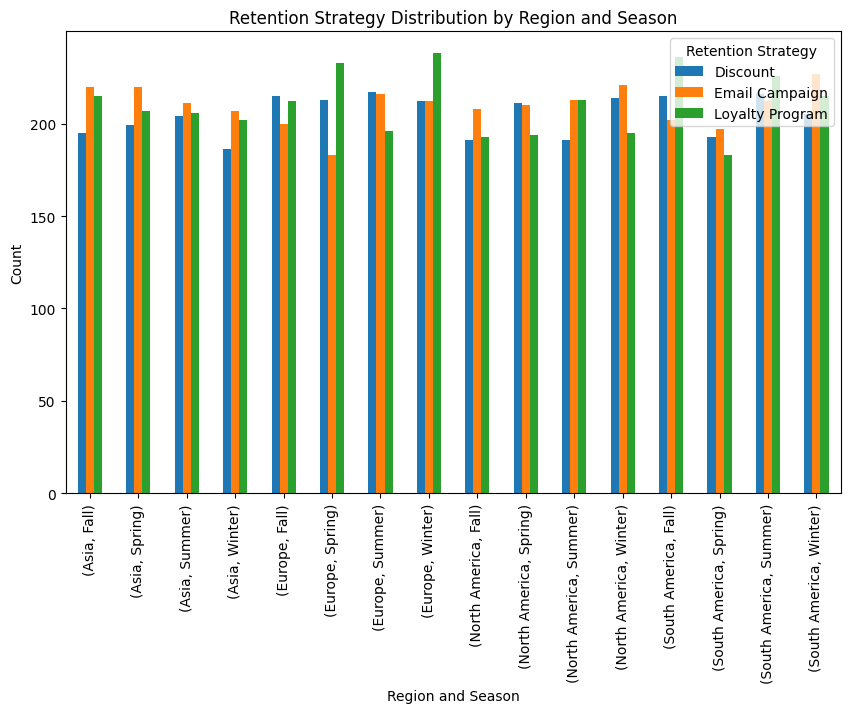

In [17]:

rentation = sales.groupby(['Region', 'Season'])['Retention_Strategy'].value_counts().reset_index(name='count')

pivot_df = rentation.pivot_table(index=['Region', 'Season'], columns='Retention_Strategy', values='count', fill_value=0)


pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Retention Strategy Distribution by Region and Season')
plt.ylabel('Count')
plt.xlabel('Region and Season')
plt.legend(title='Retention Strategy')
plt.show()

<Axes: xlabel='Most_Frequent_Category,Preferred_Purchase_Times'>

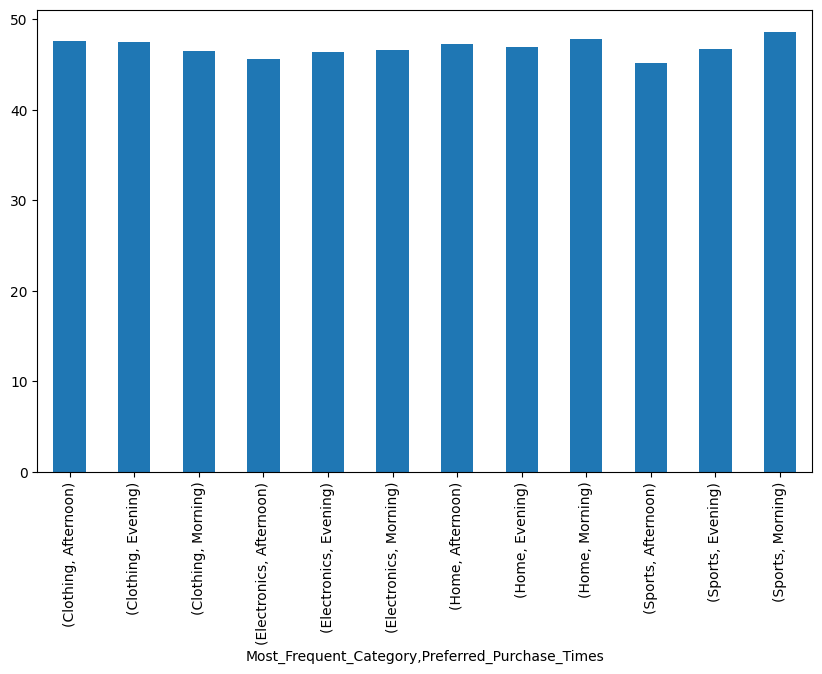

In [18]:
behavioral=sales.groupby(['Most_Frequent_Category','Preferred_Purchase_Times'])['Time_Between_Purchases'].mean().plot(kind='bar', stacked=True, figsize=(10, 6))
behavioral

<Axes: title={'center': 'Top Categories by Product Count'}, xlabel='Most_Frequent_Category'>

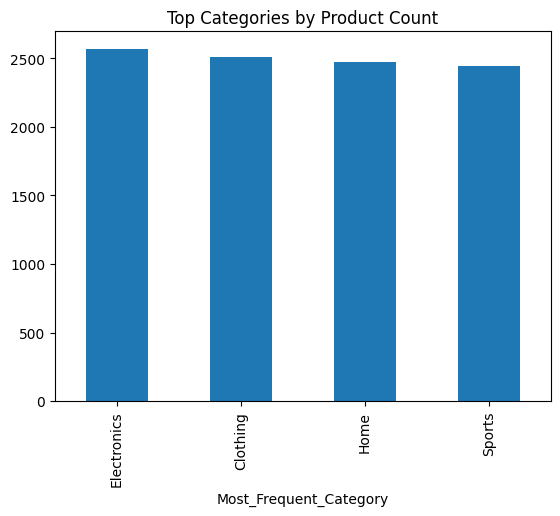

In [19]:
top_products = sales.groupby('Most_Frequent_Category')['Product_ID'].count().sort_values(ascending=False)
top_products.plot(kind='bar', title='Top Categories by Product Count')


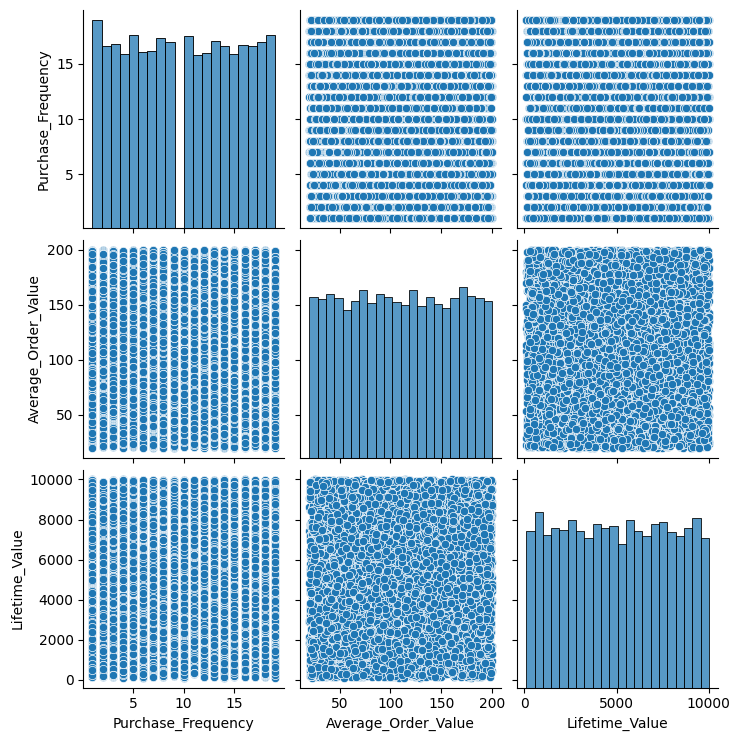

In [20]:
sns.pairplot(sales[['Purchase_Frequency', 'Average_Order_Value', 'Lifetime_Value']])


In [21]:
retention_effectiveness = sales.groupby('Retention_Strategy').agg({'Churn_Probability': 'mean', 'Lifetime_Value': 'mean'})
print(retention_effectiveness)


                    Churn_Probability  Lifetime_Value
Retention_Strategy                                   
Discount                     0.502926     5037.528264
Email Campaign               0.508348     5045.810640
Loyalty Program              0.493427     5012.618196


In [22]:
season_sales = sales.groupby('Season')['Peak_Sales_Date'].count().reset_index()
season_sales.rename(columns={'Peak_Sales_Date': 'Peak_Sales_Count'}, inplace=True)
season_sales

,Season,Peak_Sales_Count
0,Fall,2502
1,Spring,2443
2,Summer,2521
3,Winter,2534


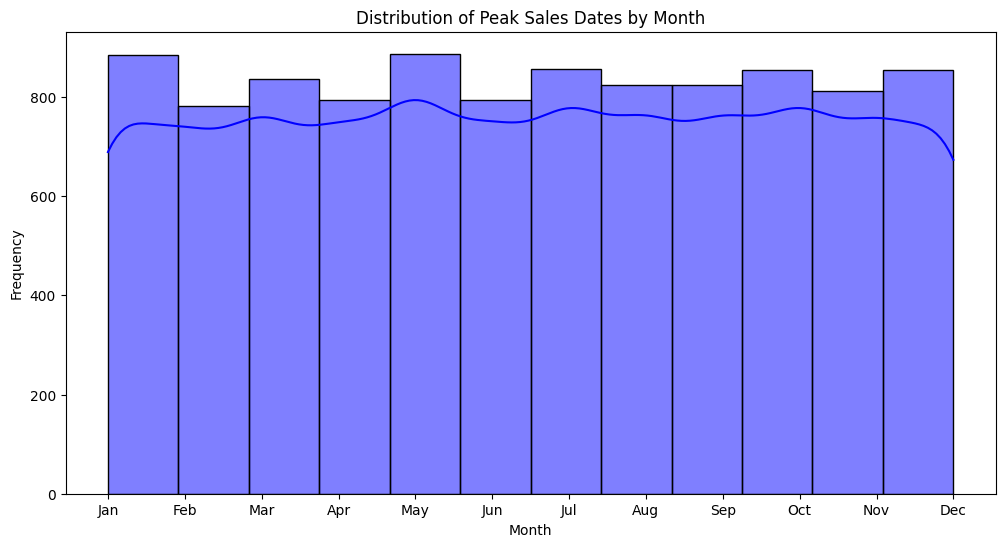

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(sales['Peak_Sales_Date'].dt.month, bins=12, kde=True, color='blue')
plt.title('Distribution of Peak Sales Dates by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
features = ['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases',
            'Lifetime_Value', 'Churn_Probability']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(sales[features])
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


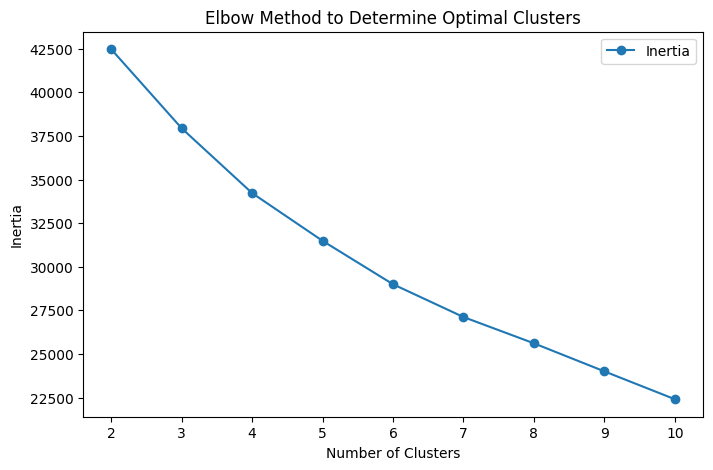

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.legend()
plt.show()

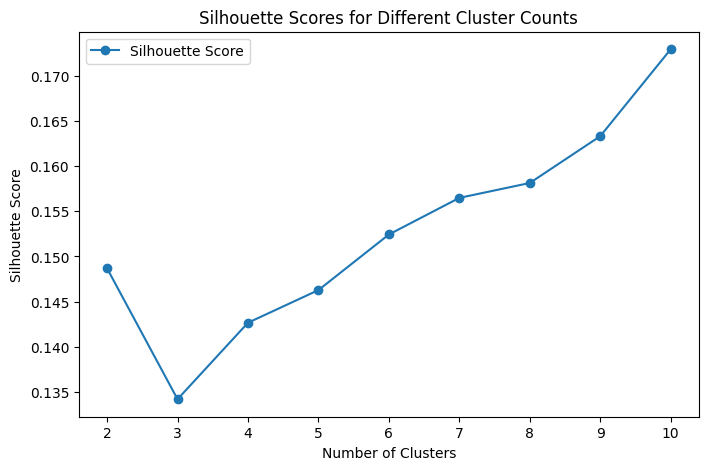

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.legend()
plt.show()

In [27]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
sales['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the Clusters
cluster_summary = sales.groupby('Cluster')[features].mean()
print(cluster_summary)

         Purchase_Frequency  Average_Order_Value  Time_Between_Purchases  \
Cluster                                                                    
0                  9.565317           111.428926               61.905617   
1                 10.212447           111.660982               21.132353   
2                 10.025240           106.600585               63.522684   

         Lifetime_Value  Churn_Probability  
Cluster                                     
0           2324.531564           0.524223  
1           5075.129898           0.487946  
2           7627.953792           0.495927  


In [28]:
from sklearn.preprocessing import LabelEncoder
columns=['Most_Frequent_Category','Region','Season']
label_encoder = LabelEncoder()
for column in sales[columns]:
  sales[column]=label_encoder.fit_transform(sales[column])


In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               10000 non-null  object        
 1   Product_ID                10000 non-null  object        
 2   Transaction_ID            10000 non-null  object        
 3   Purchase_Frequency        10000 non-null  int64         
 4   Average_Order_Value       10000 non-null  float64       
 5   Most_Frequent_Category    10000 non-null  int64         
 6   Time_Between_Purchases    10000 non-null  int64         
 7   Region                    10000 non-null  int64         
 8   Churn_Probability         10000 non-null  float64       
 9   Lifetime_Value            10000 non-null  float64       
 10  Launch_Date               10000 non-null  datetime64[ns]
 11  Peak_Sales_Date           10000 non-null  datetime64[ns]
 12  Season             

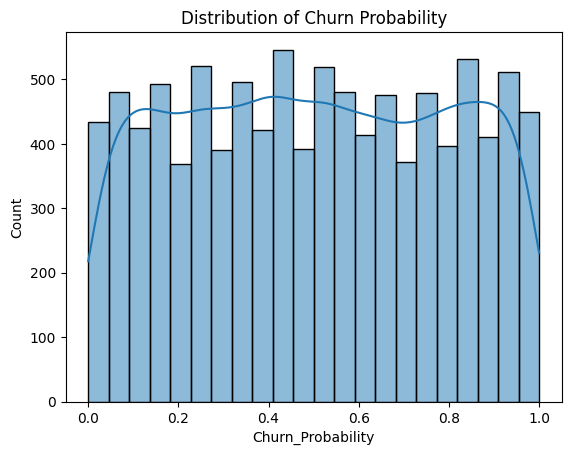

In [30]:
sns.histplot(sales['Churn_Probability'], kde=True)
plt.title('Distribution of Churn Probability')
plt.show()

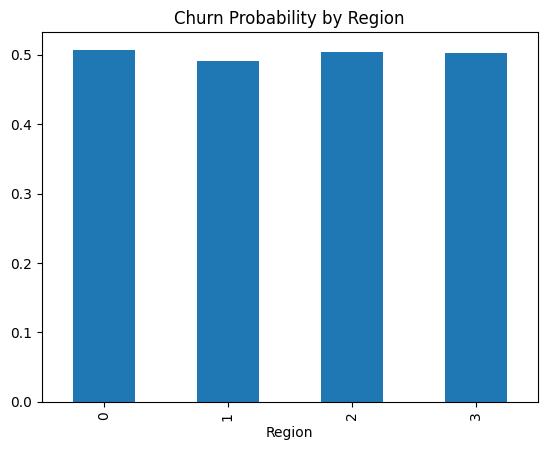

In [31]:
churn_by_region = sales.groupby('Region')['Churn_Probability'].mean()
churn_by_region.plot(kind='bar', title='Churn Probability by Region')
plt.show()

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               10000 non-null  object        
 1   Product_ID                10000 non-null  object        
 2   Transaction_ID            10000 non-null  object        
 3   Purchase_Frequency        10000 non-null  int64         
 4   Average_Order_Value       10000 non-null  float64       
 5   Most_Frequent_Category    10000 non-null  int64         
 6   Time_Between_Purchases    10000 non-null  int64         
 7   Region                    10000 non-null  int64         
 8   Churn_Probability         10000 non-null  float64       
 9   Lifetime_Value            10000 non-null  float64       
 10  Launch_Date               10000 non-null  datetime64[ns]
 11  Peak_Sales_Date           10000 non-null  datetime64[ns]
 12  Season             

In [33]:
data = sales.drop(['Customer_ID', 'Product_ID', 'Transaction_ID'], axis=1)


In [34]:
data = pd.get_dummies(data, columns=['Preferred_Purchase_Times', 'Retention_Strategy'], drop_first=True)


In [35]:
data['Launch_Year'] = data['Launch_Date'].dt.year
data['Launch_Month'] = data['Launch_Date'].dt.month
data['Peak_Sales_Month'] = data['Peak_Sales_Date'].dt.month

# Drop original date columns if not needed
data = data.drop(['Launch_Date', 'Peak_Sales_Date'], axis=1)

In [36]:


scaler = StandardScaler()
continuous_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases', 'Lifetime_Value']
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])


In [37]:
X = data.drop('Churn_Probability', axis=1)
y = data['Churn_Probability']


In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.24963053188621995
MSE: 0.08485013323042191
RMSE: 0.2912904619626635
R-squared: -0.03185877329798936


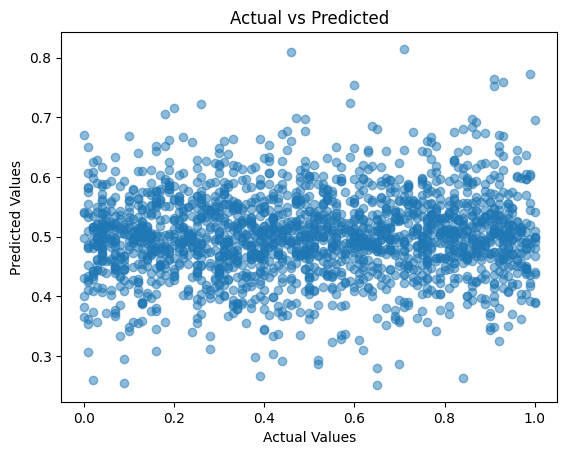

In [42]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

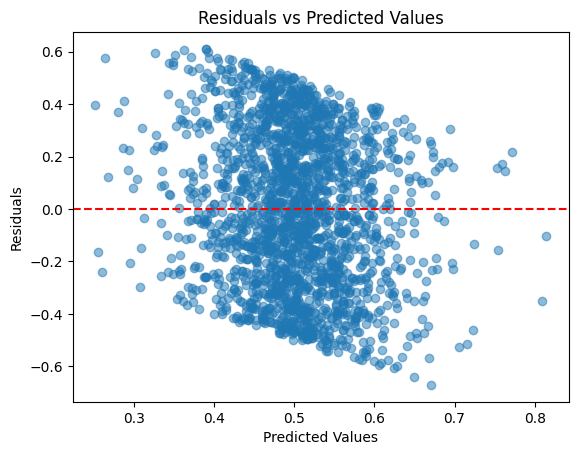

In [43]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Display results
pd.DataFrame(results).T


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] Start training from score 0.502009


,MAE,MSE,RMSE,R2
Linear Regression,0.247314,0.081915,0.286207,0.003840
Decision Tree,0.334105,0.165604,0.406944,-1.013900
Random Forest,0.247609,0.083182,0.288412,-0.011568
XGBoost,0.249631,0.084850,0.291290,-0.031859
LightGBM,0.246883,0.083390,0.288773,-0.014102


In [48]:
season_region_sales = sales.groupby(['Season', 'Region']).agg({
    'Purchase_Frequency': 'sum',
    'Average_Order_Value': 'mean',
    'Lifetime_Value': 'mean'
}).reset_index()

print(season_region_sales)

    Season  Region  Purchase_Frequency  Average_Order_Value  Lifetime_Value
0        0       0                6085           108.518460     5030.522159
1        0       1                6505           111.461611     5108.698262
2        0       2                5733           115.134510     5066.281824
3        0       3                6508           111.646217     4886.329556
4        1       0                6323           111.712764     5196.844137
5        1       1                6285           106.431749     5081.003514
6        1       2                6081           109.855431     5041.813626
7        1       3                5719           109.671257     5246.194799
8        2       0                6276           112.129404     5046.070725
9        2       1                6055           110.159205     4833.728855
10       2       2                5938           108.613728     5215.474117
11       2       3                6685           109.916284     5001.997645
12       3  

<ipython-input-49-351bcd15977b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




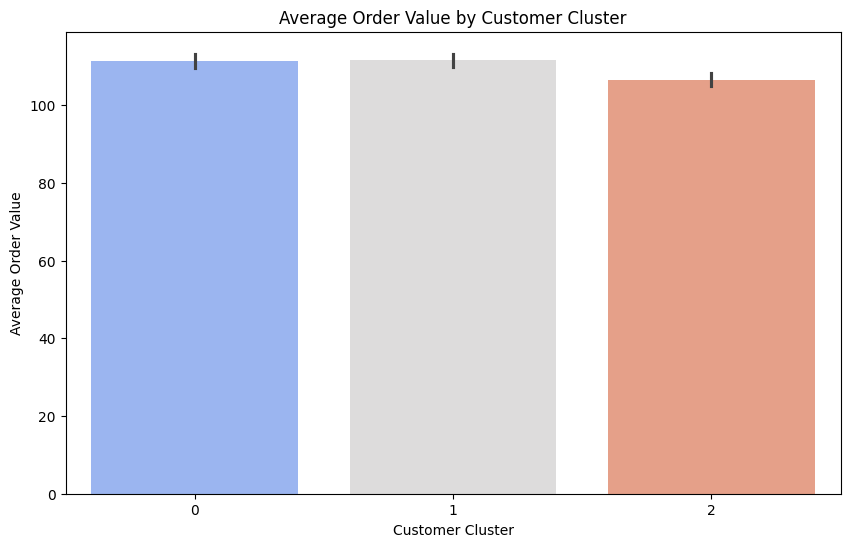

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Average_Order_Value', data=sales, palette='coolwarm')
plt.title('Average Order Value by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Average Order Value')
plt.show()